# Project 1
## DS 5030 - Understanding Uncertainty
### Isaac Tabor, Hongfei Zhu, Jarrett Markman

In [1]:
# Import packages and load data
import pandas as pd
import numpy as np
data = pd.read_csv("data/sp500_companies.csv")

### Step 1: Describe the data clearly -- particularly any missing data that might impact your analysis -- and the provenance of your dataset. Who collected the data and why?

The data being used comes from [Kaggle](https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks/data) and is *collected as of 11/7.* The data is regularly updated with data collected from FRED and yfinance to provide information on all the companies included in the S&P 500 index. The data contains details regarding the company, such as **`Shortname`, `Sector`, `Industry`, `City`, `State`, `Country`**, as well as metrics from the **S&P 500** and general financial metrics like: **`Currentprice`, `Marketcap`, `Ebitda`, `Revenuegrowth`, `Weight`**. The dataset can be used for different research and analysis of companies within the S&P 500. 

In [38]:
# See length of data and columns with missing data
print(f"There are: {len(data)} rows of data.", "The NA count by variable is:", data.isna().sum(), sep = '\n')

There are: 502 rows of data.
The NA count by variable is:
Exchange                0
Symbol                  0
Shortname               0
Longname                0
Sector                  0
Industry                0
Currentprice            0
Marketcap               0
Ebitda                 29
Revenuegrowth           3
City                    0
State                  20
Country                 0
Fulltimeemployees       9
Longbusinesssummary     0
Weight                  0
dtype: int64


The data isn't highly populated by NA values, however, there are NA values present in `Ebitda` (Earnings before interest, taxes, depreciation and amortization), `Revenuegrowth`, `State`, and `Fulltimeemployees`. To further investigate these values, we can look at the rows with missing data. 

In [44]:
# Look at rows with missing data
data[data.isna().any(axis=1)]

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
12,NYQ,JPM,JP Morgan Chase & Co.,JPMorgan Chase & Co.,Financial Services,Banks - Diversified,237.60,668924837888,NaN,0.030,New York,NY,United States,316043.0,JPMorgan Chase & Co. operates as a financial s...,0.012035
13,NYQ,V,Visa Inc.,Visa Inc.,Financial Services,Credit Services,317.71,615235846144,2.497300e+10,0.117,San Francisco,CA,United States,NaN,Visa Inc. operates as a payment technology com...,0.011069
23,NYQ,BAC,Bank of America Corporation,Bank of America Corporation,Financial Services,Banks - Diversified,44.17,338911100928,NaN,-0.005,Charlotte,NC,United States,213000.0,"Bank of America Corporation, through its subsi...",0.006097
30,NYQ,WFC,Wells Fargo & Company,Wells Fargo & Company,Financial Services,Banks - Diversified,70.34,234196303872,NaN,-0.018,San Francisco,CA,United States,220167.0,"Wells Fargo & Company, a financial services co...",0.004213
32,NYQ,ACN,Accenture plc,Accenture plc,Technology,Information Technology Services,366.37,229157109760,1.106591e+10,0.026,Dublin,NaN,Ireland,774000.0,Accenture plc provides strategy and consulting...,0.004123
34,NYQ,AXP,American Express Company,American Express Company,Financial Services,Credit Services,298.65,210382487552,NaN,0.080,New York,NY,United States,74600.0,"American Express Company, together with its su...",0.003785
37,NYQ,BX,Blackstone Inc.,Blackstone Inc.,Financial Services,Asset Management,170.84,207208415232,NaN,0.541,New York,NY,United States,4735.0,Blackstone Inc. is an alternative asset manage...,0.003728
40,NMS,LIN,Linde plc,Linde plc,Basic Materials,Specialty Chemicals,424.31,202038607872,1.258100e+10,0.025,Woking,NaN,United Kingdom,65596.0,Linde plc operates as an industrial gas compan...,0.003635
42,NYQ,MS,Morgan Stanley,Morgan Stanley,Financial Services,Capital Markets,123.44,198866780160,NaN,0.165,New York,NY,United States,80000.0,"Morgan Stanley, a financial holding company, p...",0.003578
51,NYQ,GS,"Goldman Sachs Group, Inc. (The)","The Goldman Sachs Group, Inc.",Financial Services,Capital Markets,566.10,177704452096,NaN,0.042,New York,NY,United States,46400.0,"The Goldman Sachs Group, Inc., a financial ins...",0.003197


There are a lot of NA's for `Ebitda` coming from banking/financial services companies. While `Ebitda` can be a valuable financial metric, companies like JP Morgan don't have a value, because banks operate with intrest income and expenses as their main services, unlike many other companies. 

The NA's present in the `State` variable are coming from companies present in the S&P 500 outside of the U.S., so these NA's are not problematic at all. 

There are 9 NA's coming from `Fulltimeemployees`, which come from the following companies: Visa, Starbucks, D.R. Horton, ResMed, Raymond James, Super Micro Computer, Inc., F5, Inc, Solventum, and Amentum Holdings, Inc. There doesn't appear to be any rhyme or reason as to why, however, it is important to take note of. 

There are NA's for `Revenuegrowth` coming from Verizon, American Tower Corporation, and Western Digital Corporation. There's no particular definitive reason as to why, however it can potentially be attributed to a lack of growth. 

### Step 2: What phenomenon are you modeling? Provide a brief background on the topic, including definitions and details that are relevant to your analysis. Clearly describe its main features, and support those claims with data where appropriate.

We are modeling the `Currentprice` feature from the dataset, which represents the stock price *(as of 11/7)*, for a given company present in the S&P 500. This is particularly valuable, as the current price for a stock represents the price a typical buyer would pay and a typical seller would sell. In modeling the current price, we can identify which stocks might be over or underperforming, as well as note the features that affect how much a stock will be priced at. We can use this for making financial investments or analysis. 

To further look at the `Currentprice` variable, we can plot the distribution.

Text(0.5, 1.0, 'Distribution of Current Stock Price (as of 11/7)')

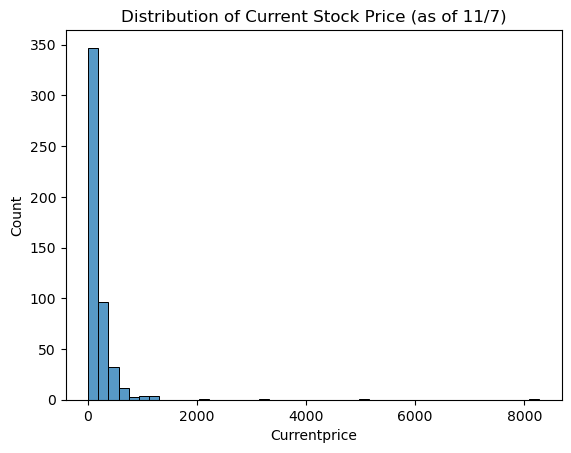

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.histplot(data['Currentprice']) 
ax.set_title("Distribution of Current Stock Price (as of 11/7)")

The distribution of `Currentprice` is right-skew, as a majority of stock prices in the S&P 500 are lower values, and there are few companies with higher stock prices. 

We can further look at these values in a boxplot, to examine where values lie in the `Currentprice` variable. 

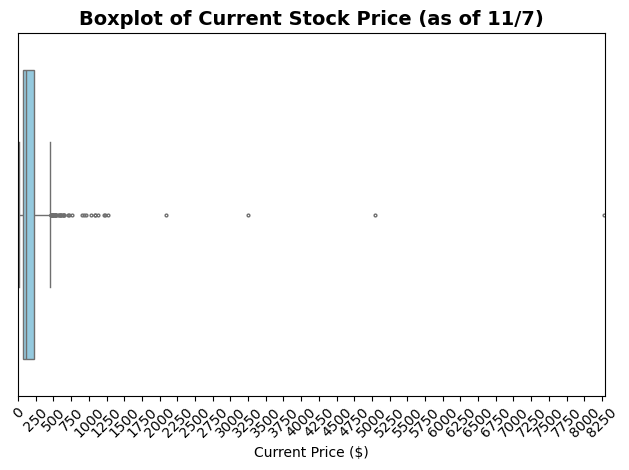

In [29]:
# Base boxplot with subtle outliers
ax = sns.boxplot(
    x='Currentprice',
    data=data,
    color='skyblue',
    fliersize=2,   
)
# Add more x-axis ticks every 100 units
max_price = data['Currentprice'].max()
max_limit = np.ceil(max_price / 100) * 100
ax.set_xlim(0, max_limit)
# Set tick positions at every $250 USD
ax.set_xticks(np.arange(0, max_limit + 100, 250))
plt.xticks(rotation=45) # Angle x-axis labels
# Titles and labels
ax.set_title("Boxplot of Current Stock Price (as of 11/7)", fontsize=14, fontweight='bold')
ax.set_xlabel("Current Price ($)")
ax.set_yticks([])  # Remove y-axis
plt.tight_layout()
plt.show()

Here we can see the same type of right-skew distribution, as it appears that 75% of stockprices occur at `$250` or less, with the outliers ranging from `$500 - $8000` per share. 

We can additionally look at the summary statistics for the numerical and categorical features present in the dataset - which consist of financial and descriptive measures for a given company present in the S&P 500. 

In [30]:
data.describe() # num vars

,Currentprice,Marketcap,Ebitda,Revenuegrowth,Fulltimeemployees,Weight
count,502.000000,5.020000e+02,4.730000e+02,499.000000,4.930000e+02,502.000000
mean,217.893685,1.107222e+11,7.045286e+09,0.070541,5.782761e+04,0.001992
std,489.205027,3.440074e+11,1.624213e+10,0.180247,1.395988e+05,0.006189
min,9.400000,4.664099e+09,-3.991000e+09,-0.602000,2.800000e+01,0.000084
25%,68.547500,1.933417e+10,1.625000e+09,0.002000,1.020000e+04,0.000348
50%,118.365000,3.706396e+10,2.952748e+09,0.051000,2.169000e+04,0.000667
75%,227.667500,7.830565e+10,6.020000e+09,0.109000,5.510000e+04,0.001409
max,8276.780000,3.846820e+12,1.495470e+11,1.632000,2.100000e+06,0.069209


The numerical features in the dataset are `Marketcap` (the current share price $\times$ the total number of outstanding shares), `Ebitda` (representative of company earnings), `Revenuegrowth` (how much a company's sales have grown since the last period), `Fulltimeemployees` (size of the company) and `Weight` (% of a company's marketcap based on the total marketcap in S&P 500), we can see a statistical summary for each of these features, in addition to `Currentprice`. These featuers can help provide insight into the stock price, as they are representative of company features and stock performance. 

We can additionally look at the categorical features present in the dataset, which consist of general information about the company.


In [5]:
# describe cat vars
data.describe(include=['O'])

,Exchange,Symbol,Shortname,Longname,Sector,Industry,City,State,Country,Longbusinesssummary
count,502,502,502,502,502,502,502,482,502,502
unique,4,502,499,499,11,114,235,41,8,499
top,NYQ,AAPL,Fox Corporation,Fox Corporation,Technology,Utilities - Regulated Electric,New York,CA,United States,"Fox Corporation operates as a news, sports, an..."
freq,348,1,2,2,82,23,38,67,481,2


A lot of the categorical information in the dataset doesn't carry that much value, as information like `Symbol`, `Shortname`, `Longname`, and `Longbusinesssummary` only provide information specific to a given company in the S&P 500, and don't provide any generalizable information for call companies. Given the size of the dataset, features like `Industry` (the industry the company is in) `City` and `State` (company location) are too unique that they could potentially lead to a poor model. Of all features, we can likely further investigate, the `Sector` and `Country` for a given company. 

In [ ]:
print(data['Sector'].value_counts())

Sector
Technology                82
Industrials               70
Financial Services        67
Healthcare                62
Consumer Cyclical         55
Consumer Defensive        37
Utilities                 32
Real Estate               31
Communication Services    22
Energy                    22
Basic Materials           22
Name: count, dtype: int64


There are a variety of sectors present in the dataset that we can potentially dummify, and use in a model.  

In [41]:
# Dummify the variables in sector
data = pd.get_dummies(data, columns=['Sector'])

In [43]:
data['Country'].value_counts()

Country
United States     481
Ireland            10
United Kingdom      3
Switzerland         3
Bermuda             2
Netherlands         1
Canada              1
Singapore           1
Name: count, dtype: int64

The `Country` variable doesn't seem to provide any generalizable information within the model, as 481 of the 502 countries are from the United States, so there isn't any unique information that the other countries will provide as the sample size is too small, and would lead to misleading results. 

### Step 3: Describe your non-parametric model (empirical cumulative distribution functions, kernel density function, local constant least squares regression, Markov transition models). How are you fitting your model to the phenomenon to get realistic properties of the data? What challenges did you have to overcome?

### Step 4: Either use your model to create new sequences (if the model is more generative) or bootstrap a quantity of interest (if the model is more inferential).

### Step 5: Critically evaluate your work in part 4. Do your sequences have the properties of the training data, and if not, why not? Are your estimates credible and reliable, or is there substantial uncertainty in your results? 

### Step 6: Write a conclusion that explains the limitations of your analysis and potential for future work on this topic.